In [12]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [13]:
df=pd.read_csv('/Users/andrewmanser/Desktop/all pdfs processed2016.csv',encoding='latin-1')
df.head()

,patientId,Date,MajorSymptoms,DisruptionScale,PercentPriorRexamImprovement,PercentConditionImprovement,ImprovementsSinceStartingTreatment,RemainingSymptoms,PainMedicationChange,PercentFollowedRecommendations,...,RecreationPrior,RecreationNow,WorkSchoolDescription,WorkSchoolInitial,WorkSchoolPrior,WorkSchoolNow,FamilyHomeDescription,FamilyHomeInitial,FamilyHomePrior,FamilyHomeNow
0,-408267762,12/21/16 0:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,...,NaN,NaN,Affects concentration,6.0,NaN,NaN,n/a,NaN,NaN,NaN
1,-1534257478,12/16/16 0:00,NaN,NaN,NaN,80,Much less pain. Better posture. Stronger mus...,"I need to wear my back brace when driving., So...",NaN,90,...,NaN,NaN,Sitting back makes the symptoms worse. Diffic...,8.0,NaN,2.0,NaN,NaN,NaN,NaN
2,914593685,12/16/16 0:00,NaN,NaN,50.0,90,"less headache, less neck pain and less leg pain",Still have lower back and leg pain once in a w...,NaN,80,...,3.0,NaN,n/a,NaN,1.0,NaN,n/a,NaN,2.0,NaN
3,-1003509597,12/13/16 0:00,NaN,NaN,30.0,60,The pain/discomfort occurs less frequently and...,"Achy lower back, especially in the morning or ...",NaN,100,...,NaN,NaN,no impact,NaN,NaN,NaN,no impact,NaN,NaN,NaN
4,1339646554,12/9/16 0:00,NaN,NaN,30.0,50,my back is doing better without belt. i am abl...,pain noticed above hip joint.,NaN,100,...,7.0,7.0,NaN,NaN,0.0,NaN,NaN,6.0,4.0,4.0


In [14]:
df.dtypes

patientId                                    int64
Date                                        object
MajorSymptoms                              float64
DisruptionScale                            float64
PercentPriorRexamImprovement               float64
PercentConditionImprovement                  int64
ImprovementsSinceStartingTreatment          object
RemainingSymptoms                           object
PainMedicationChange                       float64
PercentFollowedRecommendations               int64
ThingsThatCanImproveExperience              object
PatientsSignatureDate                       object
CervicalMovementRotationL                  float64
CervicalMovementRotationR                  float64
CervicalMovementLateralFlexionL            float64
CervicalMovementLateralFlexionR            float64
CervicalMovementFlexion                    float64
CervicalMovementExtension                  float64
ThoracolumbarMovementRotationL             float64
ThoracolumbarMovementRotationR 

**Above we loaded the data into Python and began exploring it using the pandas library.  There are 313 patients with 53 columns many of which aren't numerical, as well as some that are not useful for comaprison such as the movement categories.  The next several cells are dropping columns and making the data more manageable for useful analysis.

In [15]:
df2=df.drop(df.columns[[0,1,2,3,4,6,7,8, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1)

In [16]:
df2.dtypes

PercentConditionImprovement         int64
PercentFollowedRecommendations      int64
SelfCareInitial                   float64
SelfCarePrior                     float64
SelfCareNow                       float64
FrameOfMindDescription             object
FrameOfMindInitial                float64
FrameOfMindPrior                  float64
FrameOfMindNow                    float64
RecreationDescription              object
RecreationInitial                 float64
RecreationPrior                   float64
RecreationNow                     float64
WorkSchoolDescription              object
WorkSchoolInitial                 float64
WorkSchoolPrior                   float64
WorkSchoolNow                     float64
FamilyHomeDescription              object
FamilyHomeInitial                 float64
FamilyHomePrior                   float64
FamilyHomeNow                     float64
dtype: object

In [17]:
df2.head(5)

,PercentConditionImprovement,PercentFollowedRecommendations,SelfCareInitial,SelfCarePrior,SelfCareNow,FrameOfMindDescription,FrameOfMindInitial,FrameOfMindPrior,FrameOfMindNow,RecreationDescription,...,RecreationPrior,RecreationNow,WorkSchoolDescription,WorkSchoolInitial,WorkSchoolPrior,WorkSchoolNow,FamilyHomeDescription,FamilyHomeInitial,FamilyHomePrior,FamilyHomeNow
0,0,0,4.0,NaN,NaN,Affects concentration,6.0,NaN,NaN,n/a,...,NaN,NaN,Affects concentration,6.0,NaN,NaN,n/a,NaN,NaN,NaN
1,80,90,NaN,NaN,NaN,Concentration,8.0,NaN,0.0,NaN,...,NaN,NaN,Sitting back makes the symptoms worse. Diffic...,8.0,NaN,2.0,NaN,NaN,NaN,NaN
2,90,80,NaN,0.0,NaN,Frustration that have to live with neck pain,NaN,1.0,NaN,n/a,...,3.0,NaN,n/a,NaN,1.0,NaN,n/a,NaN,2.0,NaN
3,60,100,NaN,NaN,NaN,no impact,NaN,NaN,NaN,Still have numbness in my right leg. After st...,...,NaN,NaN,no impact,NaN,NaN,NaN,no impact,NaN,NaN,NaN
4,50,100,5.0,3.0,3.0,NaN,4.0,3.0,0.0,NaN,...,7.0,7.0,NaN,NaN,0.0,NaN,NaN,6.0,4.0,4.0


In [18]:
df2=df2.drop(df2.columns[[5,9,13,17]], axis=1)

In [19]:
doctors=df2.drop(df2.columns[[3,6,9,12,15]],axis=1)
doctors.head()

,PercentConditionImprovement,PercentFollowedRecommendations,SelfCareInitial,SelfCareNow,FrameOfMindInitial,FrameOfMindNow,RecreationInitial,RecreationNow,WorkSchoolInitial,WorkSchoolNow,FamilyHomeInitial,FamilyHomeNow
0,0,0,4.0,NaN,6.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
1,80,90,NaN,NaN,8.0,0.0,NaN,NaN,8.0,2.0,NaN,NaN
2,90,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50,100,5.0,3.0,4.0,0.0,9.0,7.0,NaN,NaN,6.0,4.0


**We have now filtered the dataframe down to 12 columns.  The first is the percent that their condition improved after treatment, the second the percent that the patient followed recommendations, and the next 10 are before and after levels of patient dysfunction.  In this header of the 313 patients we can see a few NaN (not a number) values where the number wasn't filled in.  Instead of deleting these records or filling them in with an arbitrary number we can do the rest of our statistical analysis with the Python libraries as they are able to ignore this for everything besides calculating percent ranges.

**Now that the data frame is filtered down we can do analysis.  Below is a correlation matrix of the 12 columns.  0 means that there is no correlation, 1 means the column is 100% correlated, and -1 means the column is 100% negatively correlated.  The SelfCare, FrameofMind, etc. are all measures of dysfunction meaning less is better, so as expected we see that the ones with Now (after treatment) are negatively correlated with Percent Condition Improvement. 

**One very interesting insight is the very high correlation, 48%, between Percent Condition Improvement and Percent Followed Recommendations.  This shows that there seems to be a strong link between following the advice of the doctor and patients improving.

In [20]:
doctors.corr()

,PercentConditionImprovement,PercentFollowedRecommendations,SelfCareInitial,SelfCareNow,FrameOfMindInitial,FrameOfMindNow,RecreationInitial,RecreationNow,WorkSchoolInitial,WorkSchoolNow,FamilyHomeInitial,FamilyHomeNow
PercentConditionImprovement,1.000000,0.483512,-0.161254,-0.520862,-0.161297,-0.381897,-0.057027,-0.510277,0.005603,-0.413973,-0.225434,-0.515771
PercentFollowedRecommendations,0.483512,1.000000,-0.077010,-0.235582,-0.216084,-0.145699,-0.164881,-0.335178,-0.087815,-0.100350,-0.224072,-0.205740
SelfCareInitial,-0.161254,-0.077010,1.000000,0.423794,0.664831,0.242548,0.717893,0.272492,0.653064,0.168415,0.656605,0.241837
SelfCareNow,-0.520862,-0.235582,0.423794,1.000000,0.423730,0.589791,0.194743,0.658048,0.243909,0.592866,0.309101,0.677015
FrameOfMindInitial,-0.161297,-0.216084,0.664831,0.423730,1.000000,0.416539,0.716863,0.379266,0.696769,0.320651,0.747486,0.424826
FrameOfMindNow,-0.381897,-0.145699,0.242548,0.589791,0.416539,1.000000,0.250861,0.466195,0.199665,0.633325,0.282090,0.612458
RecreationInitial,-0.057027,-0.164881,0.717893,0.194743,0.716863,0.250861,1.000000,0.384085,0.750826,0.125801,0.721070,0.212915
RecreationNow,-0.510277,-0.335178,0.272492,0.658048,0.379266,0.466195,0.384085,1.000000,0.268215,0.684691,0.280320,0.692678
WorkSchoolInitial,0.005603,-0.087815,0.653064,0.243909,0.696769,0.199665,0.750826,0.268215,1.000000,0.246727,0.737813,0.204294
WorkSchoolNow,-0.413973,-0.100350,0.168415,0.592866,0.320651,0.633325,0.125801,0.684691,0.246727,1.000000,0.154848,0.711189


**Now we are going to break down and look at descriptive statistics for each column.  The main thing to focus on is the mean (average), but it's worth noting that a large percentage of the 313 patients over this period reported results in each of the categories under the count (number of patients filling in a value for that field in the survey).

**The change in patient's condition was improved by an average of 68% after treatment, a great result.  71% of patients on average followed the doctor's recommendations, and as noted in the above correlation matrix this was strongly correlated with the condition improving more than without following the doctor's recommendations.  

**In each area including Self Care, Frame of Mind, Recreation, Work/School, and Family/Home you can see a dramatic reduction in the mean level of dysfunction from the initial period vs now.  This was done on a scale from 0-10 with 0 being no dysfunction, and 10 being totally unable to function.  

In [21]:
doctors.describe()

/Users/andrewmanser/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PercentConditionImprovement,PercentFollowedRecommendations,SelfCareInitial,SelfCareNow,FrameOfMindInitial,FrameOfMindNow,RecreationInitial,RecreationNow,WorkSchoolInitial,WorkSchoolNow,FamilyHomeInitial,FamilyHomeNow
count,313.000000,313.000000,177.000000,157.000000,150.000000,137.000000,180.000000,157.000000,126.000000,109.000000,142.000000,128.000000
mean,67.188498,71.405751,5.435028,1.993631,5.226667,2.072993,5.950000,2.662420,6.079365,2.009174,5.007042,2.109375
std,30.578078,35.517307,2.881665,1.929849,2.974493,1.881157,3.211841,2.285838,3.352857,2.110360,2.844670,1.836782
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,60.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,80.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,90.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100.000000,100.000000,10.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


**Finally we created a bar chart of the before and after of the average patient's level of dysfunction as listed in each category above.  The titles were abbreviated for space, and 'B' stands for before with 'A' standing for after.  Again we can clearly see a marked improvement in patient's functionality across a broad spectrum of their lives after they've been treated.  

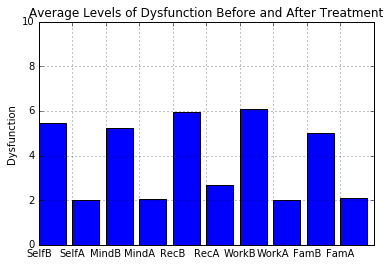

In [22]:
# Create a list of the mean scores for each variable
mean_values = [doctors['SelfCareInitial'].mean(), doctors['SelfCareNow'].mean(), doctors['FrameOfMindInitial'].mean(),doctors['FrameOfMindNow'].mean(),doctors['RecreationInitial'].mean(),doctors['RecreationNow'].mean(),doctors['WorkSchoolInitial'].mean(),doctors['WorkSchoolNow'].mean(),doctors['FamilyHomeInitial'].mean(),doctors['FamilyHomeNow'].mean()]

# Create a list of variances, which are set at .25 above and below the score
variance =[doctors['SelfCareInitial'].mean()*0.25, doctors['SelfCareInitial'].mean()*0.25, doctors['FrameOfMindInitial'].mean()*0.25,doctors['FrameOfMindNow'].mean()*0.25,doctors['RecreationInitial'].mean()*0.25,doctors['RecreationNow'].mean()*0.25,doctors['WorkSchoolInitial'].mean()*0.25,doctors['WorkSchoolNow'].mean()*0.25,doctors['FamilyHomeInitial'].mean()*0.25,doctors['FamilyHomeNow'].mean()*0.25]

# Set the bar labels
bar_labels = ['SelfB', 'SelfA', 'MindB','MindA','RecB','RecA','WorkB','WorkA','FamB','FamA']

# Create the x position of the bars
x_pos = list(range(len(bar_labels)))

# Create the plot bars
# In x position
plt.bar(x_pos,
        # using the data from the mean_values
        mean_values)

# add a grid
plt.grid()

# set height of the y-axis
max_y = max(zip(mean_values, variance)) 
plt.ylim([0, 10])

# set axes labels and title
plt.ylabel('Dysfunction')
plt.xticks(x_pos, bar_labels)
plt.title('Average Levels of Dysfunction Before and After Treatment')

plt.show()